# Исследование продаж видеоигр

В распоряжении данные о продажах видеоигр до 2016 года, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерность. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**

Получим данные из файла `games.csv`. Изучим общую информацию. На следующем этапе нужно проверить данные на пропуски, преобразовать данные в нужный тип, добавить дополнительный столбец для исследования. На третьем этапе изучим некоторые вопросы исследования. На четвёртом этапе составим портрет пользователя каждого региона. На последнем этапе проверим гипотызы.  

Таким образом, исследование пройдёт в пять этапов:
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-из-файла" data-toc-modified-id="Изучение-общей-информации-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Изучение общей информации из файла

Импортируем библиотеку `pandas`, `matplotlib` и `scipy`. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')

Выведим первые 20 строчек датафрейма `data` на экран.

In [2]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведим основную информацию о датафрейме с помощью метода `info()`.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных

Приведём названия столбцов к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()

Заменим значения `tbd` (to be determined) в столбце `user_score` на `NaN`. Для таких игр не хватает оценок пользователей, чтобы сформировать рейтинг.

In [5]:
data['user_score'] = data['user_score'].replace('tbd', None)

Преобразуем данные в нужные типы. Столбец `user_score` лучше перевести в тип `float`. Столбец `year_of_release` в `Int64`

In [6]:
data['user_score'] = data['user_score'].astype('float')
data['year_of_release'] = data['year_of_release'].astype('Int64')

Выведим количество пропущенных значений для каждого столбца.

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         7955
rating             6766
dtype: int64

Мы не можем устранить пропуски в столбцах, так как оценки могут сильно отличаться на разных платформах. В других столбцах пропусков немного.

Запомним пропуски в столбце `rating` значением `unknown` 

In [8]:
data['rating'] = data['rating'].fillna('unknown')

Посчитаем количество дубликатов.

In [9]:
data.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах и запишем в столбец `total_sales`.

In [10]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Вывод:** Мы преобразовали данные в нужные типы. Проверили данные на пропуски и дубликаты. Добавили новый столбец суммарных продаж. Было обнаружено много пропусков в столбцах c оценками и возрастным рейтингом. В целом это может быть связано, как обычно со сбоем системы или в отсутствие каких-то данных. В столбцах с оценками это связано скорее всего, с малым количеством оценок, чтобы сформировать общий рейтинг или с отсутствием конкретной игры на агрегаторе оценок. В столбце с возрастным ограничением пропуски связаны с тем, что у игры может не быть рейтинга ESRB.

### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

<AxesSubplot:xlabel='year_of_release'>

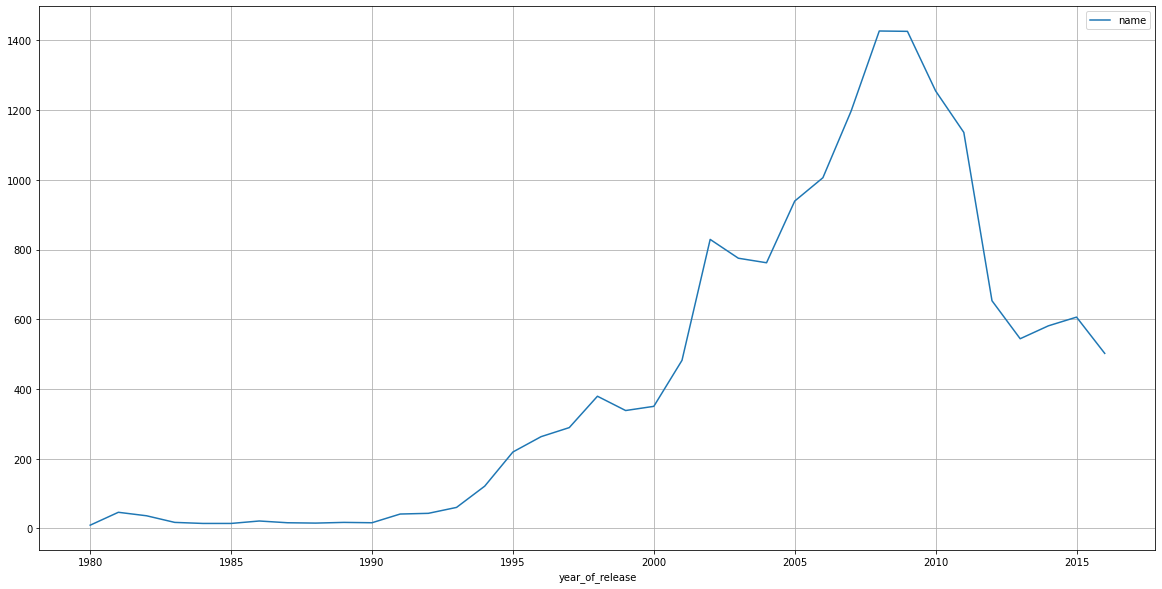

In [11]:
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(grid=True, figsize=(20, 10)) 
)

Как мы видим из графика, количество игр стремительно росло с 1990 по 2008 год. 

Найдём платформы с наибольшими суммарными продажами.

In [12]:
pivot_table_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
pivot_table_sales = pivot_table_sales.sort_values('total_sales', ascending=False).head(10)
pivot_table_sales

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


По суммарным продажам выделяются платформы PS2, Xbox 360, PS3, Wii, DS и PS. По этим платформам построим распределение по годам.

<AxesSubplot:xlabel='year_of_release'>

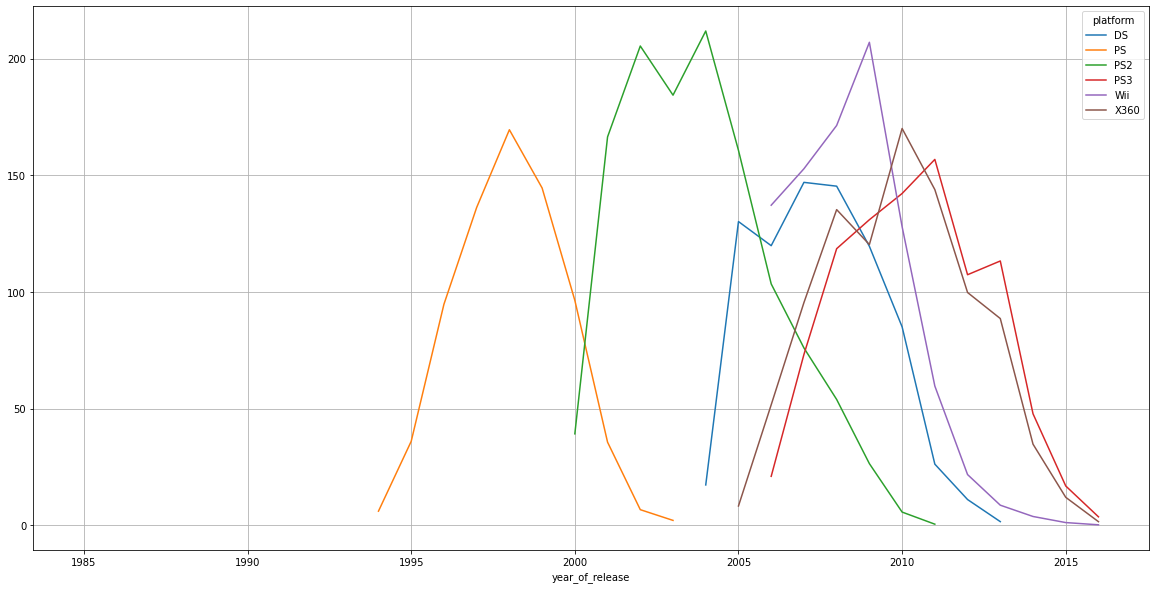

In [13]:
(
    data.query('platform == "PS2" | platform == "X360" | platform == "PS3" | platform == "Wii" | platform == "DS" | platform == "PS"')
    .pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(20, 10))
)

По графику видно, что новые платформы выпускаются примерно каждые 5-7 лет. Изучим подробнее спад продаж, который произошёл примерно с 2010 год.

<AxesSubplot:xlabel='year_of_release'>

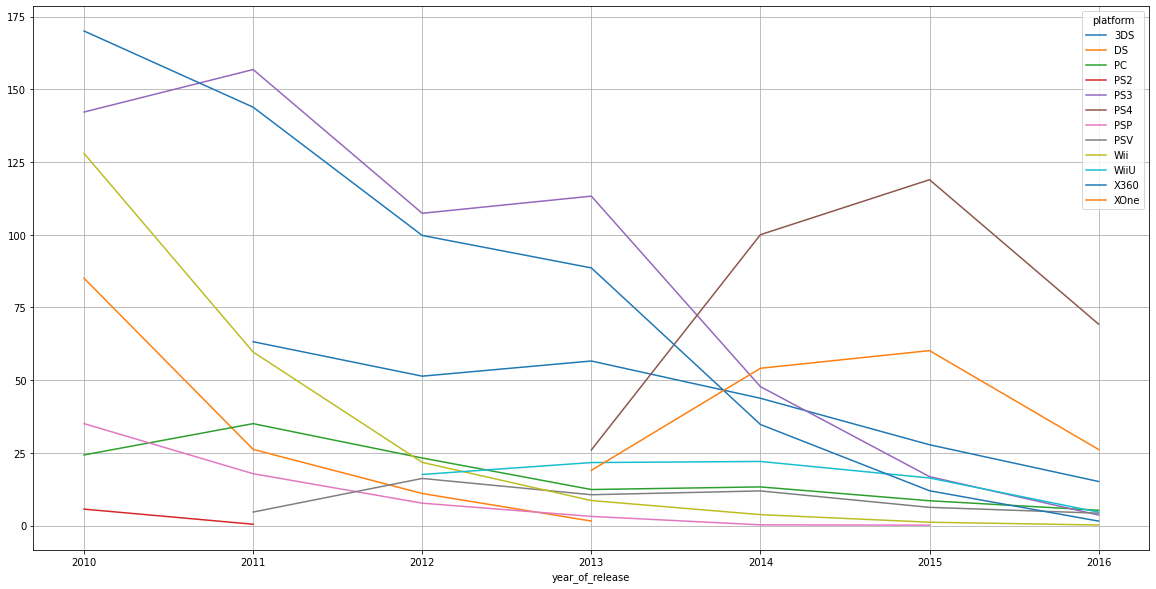

In [14]:
(
    data.query('year_of_release >= 2010')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(20, 10))
)

По графику видно, что спад продаж, скорее всего, связан с окончанием цикла жизни платформ. В 2013 году выходят PS4 и Xbox One, которые с 2014 года лидируют по продажам, их можно считать потенциально прибыльными. Продажи на PS3 и Xbox 360 падают. Актульным периодом будем считать игры, которые вышли не ранее 2013 года. Выделим их в датафрейм `actual_games`, в дальнешем будем использовать только его.

In [15]:
actual_games = data[data['year_of_release'] >= 2013]

Построим график "ящик с усамми" по глобальным продажам на актуальных платформах.

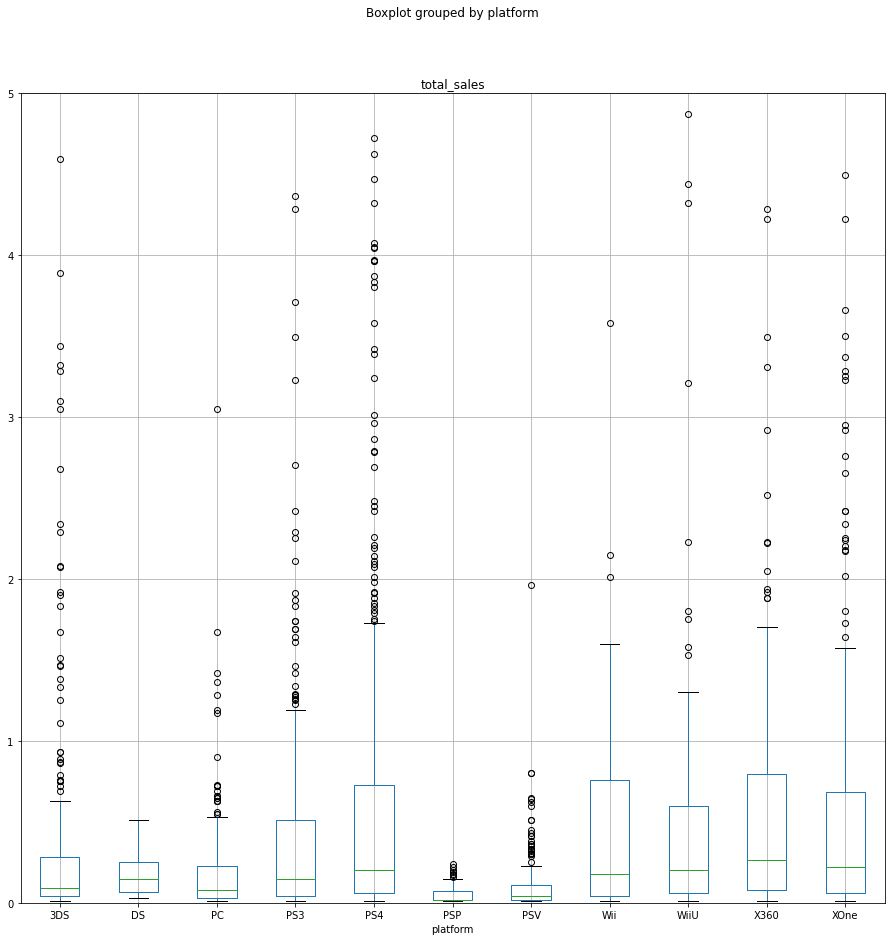

In [16]:
actual_games.boxplot('total_sales', by='platform', figsize=(15, 15))
plt.ylim(0, 5)
plt.show()

Посмотрим, как влияют на продажи отзывы пользователей и критиков на платформе PS4. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [17]:
ps4 = actual_games.query('platform == "PS4"')

Корреляция: 0.406567902061781


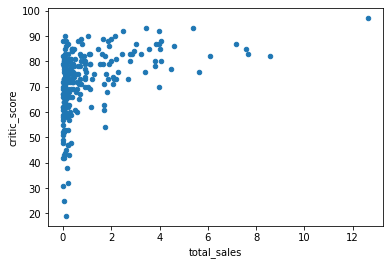

In [18]:
ps4.plot(x='total_sales', y='critic_score', kind='scatter')
print('Корреляция:', ps4['total_sales'].corr(ps4['critic_score']))

Корреляция: -0.027427851974847157


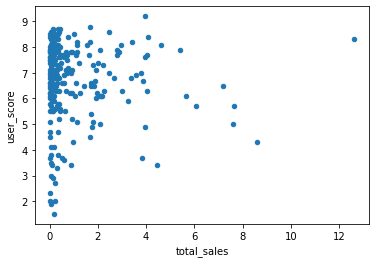

In [19]:
ps4.plot(x='total_sales', y='user_score', kind='scatter')
print('Корреляция:', ps4['total_sales'].corr(ps4['user_score']))

Небольшое влияние оценок критиков на продажи. Оценки пользователей на продажи не влияют.

Посмотрим на общее распределение игр по жанрам.

In [20]:
top_genre_sales = actual_games.pivot_table(index='genre', values='total_sales', aggfunc='median')
top_genre_sales = top_genre_sales.sort_values('total_sales', ascending=False)
top_genre_sales

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


Построим столбчатую диаграмму.

<AxesSubplot:xlabel='genre'>

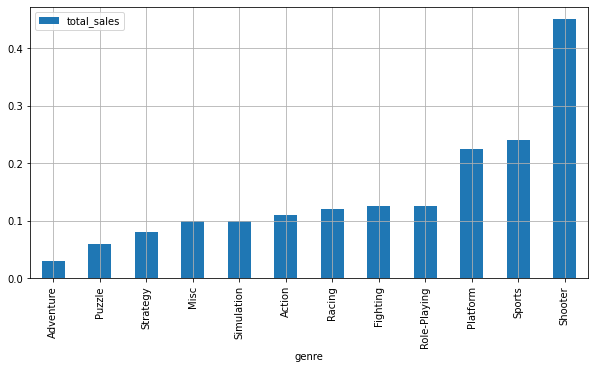

In [21]:
(
    actual_games.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values('total_sales', ascending=True)
    .plot(kind='bar', grid=True, figsize=(10, 5))
)

Шутер - самый прибыльный жанр. Самые низкие медианные продажи у приключенческих игр.   

**Вывод:** 
* Мы определили платформы с наибольшими суммарными продажами за всё время - PS2, Xbox 360, PS3, Wii, DS и PS. 
* Также определили средний цикл жизни платформ - 5-7 лет, на основе которого определили актуальный период - с 2013 года. 

* Исследовали влияние оценок критиков и пользователей на продажи на платформе PS4: первые влияют, но не сильно, вторые вообще не влияют. 

* Нашли самый прибыльный жанр (шутер) и самый убыточный (приключенческие игры).

### Портрет пользователя каждого региона

Для каждого региона найдём самые популярные платформы, самые популярные жанры и узнаем влияет ли возрастной рейтинг на продажи. Посчитем также их доли от общих продаж.

#### Северная Америка

Самые популярные платформы (топ-5)

In [22]:
top5_platform_na = actual_games.pivot_table(index='platform', values='na_sales', aggfunc='sum')
top5_platform_na = top5_platform_na.sort_values('na_sales', ascending=False)
top5_platform_na['ratio'] = top5_platform_na['na_sales'] / top5_platform_na['na_sales'].sum() 
top5_platform_na.head()

,na_sales,ratio
platform,,
PS4,108.74,0.248429
XOne,93.12,0.212744
X360,81.66,0.186562
PS3,63.50,0.145073
3DS,38.20,0.087272


Самые популярные жанры (топ-5)

In [23]:
top5_genre_na = actual_games.pivot_table(index='genre', values='na_sales', aggfunc='sum')
top5_genre_na = top5_genre_na.sort_values('na_sales', ascending=False)
top5_genre_na['ratio'] = top5_genre_na['na_sales'] / top5_genre_na['na_sales'].sum() 
top5_genre_na.head()

,na_sales,ratio
genre,,
Action,126.05,0.287976
Shooter,109.74,0.250714
Sports,65.27,0.149117
Role-Playing,46.40,0.106006
Misc,27.49,0.062804


In [24]:
top_rating_na = actual_games.pivot_table(index='rating', values='na_sales', aggfunc='sum')
top_rating_na = top_rating_na.sort_values('na_sales', ascending=False)
top_rating_na['ratio'] = top_rating_na['na_sales'] / top5_platform_na['na_sales'].sum()
top_rating_na

,na_sales,ratio
rating,,
M,165.21,0.377442
unknown,89.42,0.204291
E,79.05,0.180599
E10+,54.24,0.123918
T,49.79,0.113751


В Северной Америке разница в долях между самыми популярными платформами PS4 и XOne около 4%. Такая же разница между экшеном и шутерами. Возрастное ограничение не влияет на продажи в регионе, почти 40% продаж приходится на рейтинг `Для взрослых` 

#### Европа

Самые популярные платформы (топ-5)

In [25]:
top5_platform_eu = actual_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
top5_platform_eu = top5_platform_eu.sort_values('eu_sales', ascending=False)
top5_platform_eu['ratio'] = top5_platform_eu['eu_sales'] / top5_platform_eu['eu_sales'].sum()
top5_platform_eu.head()

,eu_sales,ratio
platform,,
PS4,141.09,0.359712
PS3,67.81,0.172883
XOne,51.59,0.131530
X360,42.52,0.108406
3DS,30.96,0.078933


Самые популярные жанры (топ-5)

In [26]:
top5_genre_eu = actual_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
top5_genre_eu = top5_genre_eu.sort_values('eu_sales', ascending=False)
top5_genre_eu['ratio'] = top5_genre_eu['eu_sales'] / top5_genre_eu['eu_sales'].sum()
top5_genre_eu.head()

,eu_sales,ratio
genre,,
Action,118.13,0.301175
Shooter,87.86,0.224001
Sports,60.52,0.154297
Role-Playing,36.97,0.094256
Racing,20.19,0.051475


In [27]:
top_rating_eu = actual_games.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
top_rating_eu = top_rating_eu.sort_values('eu_sales', ascending=False)
top_rating_eu['ratio'] = top_rating_eu['eu_sales'] / top5_platform_eu['eu_sales'].sum()
top_rating_eu

,eu_sales,ratio
rating,,
M,145.32,0.370497
E,83.36,0.212528
unknown,78.91,0.201183
E10+,42.69,0.108839
T,41.95,0.106953


В Европе Xbox One менее популярный, чем в Северной Америке. Здесь больше половины продаж приходится на платформы Sony. В Европе также, как и в Северной Америке наиболее популярны экшены и шутеры, разница в продажах около 8%. Сводная таблица по возрастному рейтингу почти идентична Северной Америке.

#### Япония

Самые популярные платформы (топ-5)

In [28]:
top5_platform_jp = actual_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
top5_platform_jp = top5_platform_jp.sort_values('jp_sales', ascending=False)
top5_platform_jp['ratio'] = top5_platform_jp['jp_sales'] / top5_platform_jp['jp_sales'].sum()
top5_platform_jp.head()

,jp_sales,ratio
platform,,
3DS,67.81,0.481674
PS3,23.35,0.165862
PSV,18.59,0.132050
PS4,15.96,0.113368
WiiU,10.88,0.077284


Самые популярные жанры (топ-5)

In [29]:
top5_genre_jp = actual_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
top5_genre_jp = top5_genre_jp.sort_values('jp_sales', ascending=False)
top5_genre_jp['ratio'] = top5_genre_jp['jp_sales'] / top5_genre_jp['jp_sales'].sum()
top5_genre_jp.head()

,jp_sales,ratio
genre,,
Role-Playing,51.04,0.362551
Action,40.49,0.287612
Misc,9.20,0.065350
Fighting,7.65,0.054340
Shooter,6.61,0.046953


In [30]:
top5_rating_jp = actual_games.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
top5_rating_jp = top5_rating_jp.sort_values('jp_sales', ascending=False)
top5_rating_jp['ratio'] = top5_rating_jp['jp_sales'] / top5_rating_jp['jp_sales'].sum()
top5_rating_jp

,jp_sales,ratio
rating,,
unknown,85.05,0.604134
T,20.59,0.146257
E,15.14,0.107544
M,14.11,0.100227
E10+,5.89,0.041838


В Японии различия между Северной Америкой и Европой уже значительные. В топе популярных платформ только отечественные платформы, где около половины продаж приходится на Nintendo 3DS. В жанрах лидируют РПГ игры и экшены с разницей между друг другом в 8%. Большая сумма продаж (60%) приходится на категорию `unknown`. Это связано с тем в Японии много игр без рейтинга ESRB. В этой стране существует другая модель - CERO. В остальном больше продаж с игр `для подростков`

**Вывод:** составим портрет пользователя для каждого региона:
* Северная Америка: Владелец PS4 или Xbox One, играющий в экшен и шутеры, старше 17 лет
* Европа: Владелец PS4, играющий в экшен и шутеры, старше 17 лет
* Япония: Владелец Nintendo 3DS, который играет в РПГ, до 13 лет

### Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем гипотезы:
* Нулевая гипотеза $H_0$: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Альтернативная гипотеза $H_1$: Средние пользовательские рейтинги платформ Xbox One и PC разные

Это проверка гипотезы равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Для этого там понадобится метод `ttest_ind` из библиотеки `scipy`

In [31]:
alpha = .05

In [32]:
xone = actual_games.query('platform == "XOne"')['user_score'] 
pc = actual_games.query('platform == "PC"')['user_score'] 
results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.16097023533449153
Не получилось отвергнуть нулевую гипотезу


Мы получили p-value около 16%, отвергнуть нулевую гипотезу не получилось. Значит с вероятностью 16% можно получить различные рейтинги, а это слишком много. Таким образом, средние пользовательские рейтинги платформ Xbox One и PC равны. 

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Сформулируем гипотезы:
* Нулевая гипотеза $H_0$: Средние пользовательские рейтинги жанров Action и Sports одинаковые
* Альтернативная гипотеза $H_1$: Средние пользовательские рейтинги жанров Action и Sports разные

In [33]:
action = actual_games.query('genre == "Action"')['user_score'] 
sports = actual_games.query('genre == "Sports"')['user_score'] 
results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  6.884181624404655e-19
Отвергаем нулевую гипотезу


p-value получилось меньше 0.05, поэтому отвергаем нулевую гипотезу. Можно сделать вывод, что средние пользовательские рейтингки жанров Action и Sports разные.

### Общий вывод

В исследовании мы изучали:
1. **Cколько игр выпускалось в разные годы.**

Количество игр стремительно росло с 1990, пик выпуска игр приходится на 2008 год. 

2. **Как менялись продажи по платформам.**

Мы выяснили, что новые платформы выпускают каждые 5-7 лет. Пик продаж приходится примерно на 7 год после выпуска платформы. Определили актуальный период с 2013 года. 

3. **Какие платформы лидируют по продажам, растут или падают?**

Растут и лидируют по продажа PS4 и Xbox One. Падают продажи на PS3 и Xbox 360

4. **Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

Для платформы PS4 выявили небольшое влияние оценок критиков на продажи. Пользовательские оценки на продажи не влияют.

5. **Общее распределение игр по жанрам** 

Определили самые продаваемый жанр - шутеры. Хуже всего продаются приключенческие игры.   

6. **Также мы составили потрет пользователя каждого региона**

* Северная Америка: Владелец PS4 или Xbox One, играющий в экшен и шутеры, старше 17 лет
* Европа: Владелец PS4, играющий в экшен и шутеры, старше 17 лет
* Япония: Владелец Nintendo 3DS, который играет в РПГ, до 13 лет

7. **Проверили гипотезы:**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные.

Обе гипотезы подтвердились.